# Clustering

# Crime Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
crime=pd.read_csv("crime_data (1).csv")
crime.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Data Exploration


In [9]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
print(crime.shape)
crime.info()

(50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Checking the Duplicated Values

In [12]:
crime.duplicated().sum()

0

In [13]:
crime[crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


Analyzing the features by creating histograms

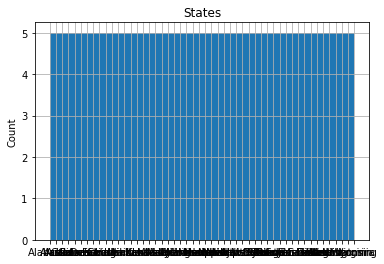

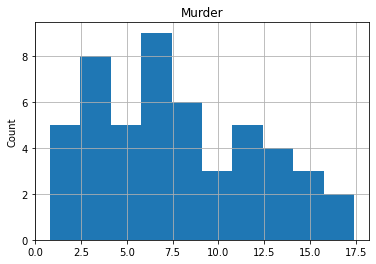

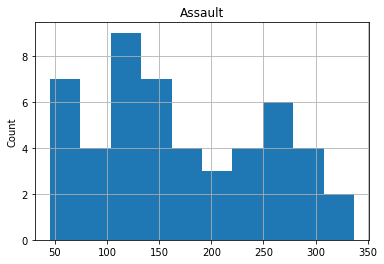

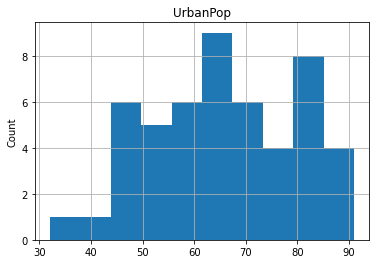

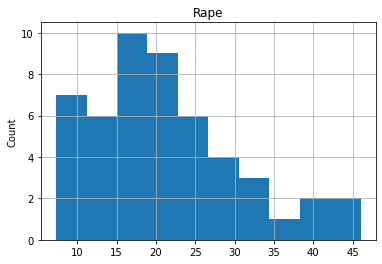

In [14]:
for feature in crime.columns:
    crime=crime.copy()
    crime[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [15]:
scalar=MinMaxScaler()
crime_scaled=scalar.fit_transform(crime.iloc[:,1:])

In [16]:
crime_norm=pd.DataFrame(crime_scaled)

<IPython.core.display.Javascript object>

In [17]:
crime_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# 1.Hierarchichal Clustering

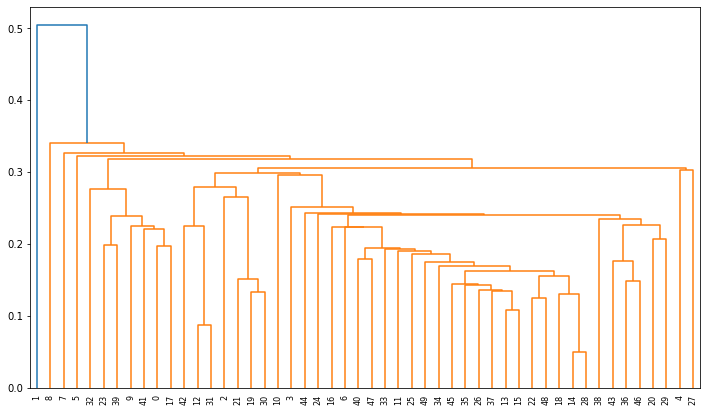

In [18]:
plt.figure(figsize=(12,7))
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='single'))

In [20]:
from sklearn.metrics import silhouette_score as sil
nc=[2,3,4,5,6,7,8,9]
score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='single')
    y=hc.fit_predict(crime_norm)
    score.append(sil(crime_norm,y))
print(score)

[0.21033337025958487, 0.14223288708185444, -0.1674119195474404, -0.18215418215195153, -0.058198610679380244, -0.0034333764345219286, -0.01103044204030864, 0.14313198214355002]


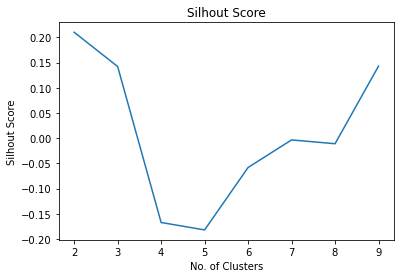

In [21]:
plt.plot(nc,score)
plt.title("Silhout Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhout Score")
plt.show()#So the best score is for first index, i.e optimum no of clusters is 2.

In [22]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='single')
y_hc=hc.fit_predict(crime_norm)
score.append(sil(crime_norm,y))
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
crime['y_hc']=y_hc
crime

,States,Murder,Assault,UrbanPop,Rape,y_hc
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [25]:
crime.groupby(['y_hc'])['States'].apply(lambda x:tuple(x))

y_hc
0    (Alabama, Arizona, Arkansas, California, Color...
1                                            (Alaska,)
Name: States, dtype: object

In [26]:
crime[crime['States'].isin(['Florida'])]

,States,Murder,Assault,UrbanPop,Rape,y_hc
8,Florida,15.4,335,80,31.9,0


In [27]:
crime['y_hc'].value_counts()

0    49
1     1
Name: y_hc, dtype: int64

In [28]:
crime[crime['States'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,States,Murder,Assault,UrbanPop,Rape,y_hc
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
8,Florida,15.4,335,80,31.9,0


# 2. k mean clustering 

In [40]:
dfkm=pd.read_csv("crime_data (1).csv")

<IPython.core.display.Javascript object>

In [41]:
scalar=MinMaxScaler()#Normalization
dfkm_scaled=scalar.fit_transform(dfkm.iloc[:,1:])

In [42]:
dfkm_norm=pd.DataFrame(dfkm_scaled)
dfkm_norm

<IPython.core.display.Javascript object>

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [43]:
dfkm.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
dfkm.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [44]:
dfkm_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
 3   3       50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [45]:
score=[]
score_elbow=[]
nc=[2,3,4,5,6]
for i in nc:
    kmeans=KMeans(i)
    kmeans.fit(dfkm_norm)
    y_pred=kmeans.fit_predict(dfkm_norm)
    score.append(sil(dfkm_norm,y_pred))
    score_elbow.append(kmeans.inertia_)   
print(score)
print(score_elbow)

[0.42364457559625074, 0.3187755079997931, 0.3349095719865253, 0.2944150330755202, 0.3106654256449779]
[6.596893867946197, 5.010878493006418, 3.690820410392111, 3.242793774179266, 2.8403508357011527]


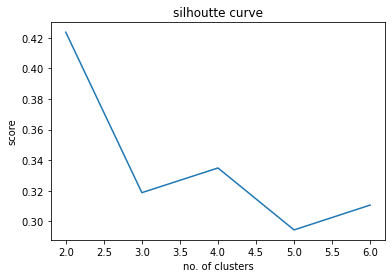

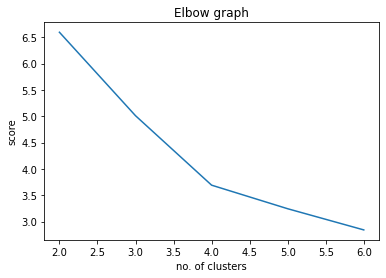

In [46]:
plt.plot(nc,score)
plt.xlabel('no. of clusters')
plt.ylabel('score')
plt.title('silhoutte curve')
plt.show()

plt.plot(nc,score_elbow)
plt.xlabel('no. of clusters')
plt.ylabel('score')
plt.title('Elbow graph')
plt.show()#Best score is for index 4 so optimum no. of cluster is 4.

In [47]:
kmm=KMeans(n_clusters=4)
kmm.fit(dfkm_norm)
y_km=kmm.fit_predict(dfkm_norm)

In [48]:
y_km

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [49]:
pd.DataFrame(kmm.labels_).value_counts()

<IPython.core.display.Javascript object>

0    16
2    13
3    13
1     8
dtype: int64

In [50]:
dfkm['y_km']=y_km

In [51]:
dfkm

,States,Murder,Assault,UrbanPop,Rape,y_km
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [52]:
dfkm['y_km'].value_counts()

0    16
3    13
2    13
1     8
Name: y_km, dtype: int64

In [53]:
dfkm[dfkm['States'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,States,Murder,Assault,UrbanPop,Rape,y_km
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,0
8,Florida,15.4,335,80,31.9,3


In [54]:
dfkm.groupby(['y_km'])['States'].apply(lambda x:tuple(x))

y_km
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Alabama, Arkansas, Georgia, Louisiana, Missis...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
3    (Alaska, Arizona, California, Colorado, Florid...
Name: States, dtype: object

In [55]:
dfdb=pd.read_csv('crime_data (1).csv')
dfdb

<IPython.core.display.Javascript object>

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [56]:
dfdb.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
dfdb.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [57]:
scalar=MinMaxScaler()
dfdb_scaled=scalar.fit_transform(dfdb.iloc[:,1:])

# DBSCAN Clustering

In [58]:
dfdb_norm=pd.DataFrame(dfdb_scaled)
dfdb_norm

<IPython.core.display.Javascript object>

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [59]:
dbscan=DBSCAN(eps=0.3,min_samples=4)
dbscan.fit(dfdb_norm)
y_db_1=dbscan.fit_predict(dfdb_norm)
y_db_1

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
dfdb['y_db']=y_db_1
dfdb

,States,Murder,Assault,UrbanPop,Rape,y_db
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [61]:
dfdb['y_db'].value_counts()

 1    37
 0     7
-1     6
Name: y_db, dtype: int64

In [62]:
dfdb[dfdb['States'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,States,Murder,Assault,UrbanPop,Rape,y_db
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
8,Florida,15.4,335,80,31.9,-1


In [63]:
dfdb['y_hc']=y_hc
dfdb['y_km']=y_km
dfdb['y_db']=y_db_1
dfdb

,States,Murder,Assault,UrbanPop,Rape,y_db,y_hc,y_km
0,Alabama,13.2,236,58,21.2,0,0,1
1,Alaska,10.0,263,48,44.5,-1,1,3
2,Arizona,8.1,294,80,31.0,1,0,3
3,Arkansas,8.8,190,50,19.5,1,0,1
4,California,9.0,276,91,40.6,-1,0,3
5,Colorado,7.9,204,78,38.7,-1,0,3
6,Connecticut,3.3,110,77,11.1,1,0,0
7,Delaware,5.9,238,72,15.8,-1,0,0
8,Florida,15.4,335,80,31.9,-1,0,3
9,Georgia,17.4,211,60,25.8,0,0,1


For Hierarchical we are getting 2 clusters, for KMeans we are getting 4 clusters and for DBSCAN we are getting 3 clusters.

# EastWest Airlines

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
EWAL=pd.read_excel('EastWestAirlines (1).xlsx',sheet_name='data')
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [69]:
EWAL.shape

(3999, 12)

In [70]:
EWAL.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [71]:
scalar=MinMaxScaler()
EWAL_scaled=scalar.fit_transform(EWAL.iloc[:,1:])

In [72]:
EWAL_norm=pd.DataFrame(EWAL_scaled)
EWAL_norm


,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchichal

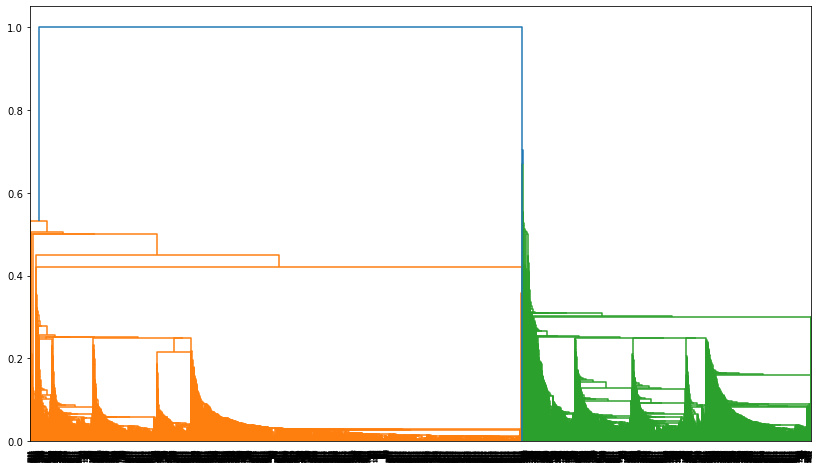

In [73]:
plt.figure(figsize=(14,8))
dendrogram=sch.dendrogram(sch.linkage(EWAL_norm,method='single'))

In [74]:
from sklearn.metrics import silhouette_score as sil

In [75]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,linkage='single',affinity='euclidean')
    y=hc.fit_predict(EWAL_norm.iloc[:,:10])
    sc_score.append(sil(EWAL_norm.iloc[:,:10],y))
print('silhout score',sc_score)

silhout score [0.6626048712239866, 0.3500610320368856, 0.3484571052666959, 0.3481223794633064, 0.34607936863073935, 0.21586598300650822, 0.21989311696635602, 0.12102373991382491, 0.1207559321980969]


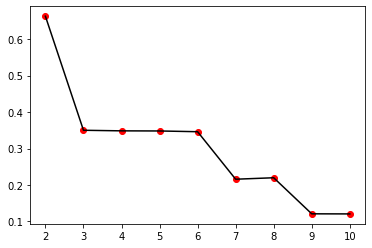

In [76]:
plt.plot(nc,sc_score,color='black')
plt.scatter(nc,sc_score,color='red')
plt.show()#Best silhout score is for first index so optimim no. of clusters will be 2.


In [77]:
f_hc=AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')

In [78]:
y_hc=f_hc.fit_predict(EWAL_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [79]:
EWAL['y_hc']=y_hc
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [80]:
EWAL.groupby(['y_hc'])['ID#'].apply(lambda x:tuple(x))

y_hc
0    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
1    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
Name: ID#, dtype: object

In [81]:
EWAL['y_hc'].value_counts()

1    2518
0    1481
Name: y_hc, dtype: int64

# KMeans

In [83]:
EWALkm=pd.read_excel('EastWestAirlines (1).xlsx',sheet_name='data')
EWALkm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [84]:
scalar=MinMaxScaler()
EWALkm_scaled=scalar.fit_transform(EWALkm.iloc[:,1:])

In [85]:
EWALkm_norm=pd.DataFrame(EWALkm_scaled)
EWALkm_norm


,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [86]:
n_c=[2,3,4,5,6,7,8,9,10]
score=[]
score_elbow=[]
for i in n_c:
    km=KMeans(i)
    km.fit(EWALkm_norm.iloc[:,:10])
    y_km=km.fit_predict(EWALkm_norm.iloc[:,:10])
    score.append(sil(EWALkm_norm.iloc[:,:10],y_km))
    score_elbow.append(km.inertia_)

In [87]:
print(score)

print(score_elbow)

[0.4811541557645117, 0.40386159145702677, 0.37660565218548464, 0.3753554767508391, 0.32643234619919453, 0.33344231488421766, 0.33885672649416093, 0.33677599291981625, 0.34688413446913824]
[448.9989194445709, 331.4304121658554, 272.3928464519211, 241.07734593895765, 217.7614213876127, 200.21659672832462, 183.18872759991913, 172.1092625259012, 164.46847386806888]


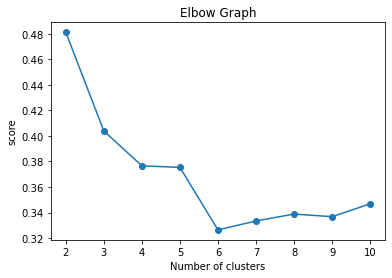

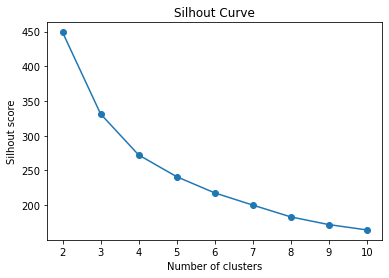

In [88]:
plt.plot(n_c,score)
plt.scatter(n_c,score)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()
plt.plot(n_c,score_elbow)
plt.scatter(n_c,score_elbow)
plt.title('Silhout Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhout score')
plt.show()

optimim no. of cluster is 4


In [89]:
kmm=KMeans(n_clusters=4)
kmm.fit(EWALkm_norm.iloc[:,:10])
y_km_2=kmm.fit_predict(EWALkm_norm.iloc[:,:10])

y_km_2=pd.DataFrame(y_km_2)
y_km_2
y_kmeans=kmm.labels_
pd.DataFrame(y_kmeans).value_counts()

In [90]:
EWALkm['y_kmeans']=y_km_2

In [91]:
EWALkm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [92]:
EWALkm['y_kmeans'].value_counts()


0    1408
1    1165
2     747
3     679
Name: y_kmeans, dtype: int64

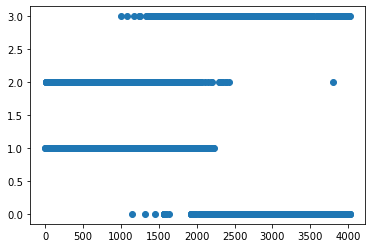

In [93]:
plt.scatter(EWALkm["ID#"],EWALkm["y_kmeans"],cmap=plt.cm.Accent)
plt.show()

# DBSCAN Clustering

In [95]:
EWALdb=pd.read_excel('EastWestAirlines (1).xlsx',sheet_name='data')
EWALdb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [96]:
scalar=MinMaxScaler()
EWALdb_scaled=scalar.fit_transform(EWALdb.iloc[:,1:])

In [97]:
EWALdb_norm=pd.DataFrame(EWALdb_scaled)
EWALdb_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [98]:
dbscan=DBSCAN(eps=0.4,min_samples=4)
dbscan.fit(EWALdb_norm.iloc[:,:10])
y_pred=dbscan.labels_

In [99]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
y_db=dbscan.labels_
y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
EWALdb['y_db']=y_pred

In [102]:
EWALdb['y_db'].value_counts()

 0    3933
 2      26
-1      17
 1      14
 3       9
Name: y_db, dtype: int64

In [103]:
EWALdb['y_db']=y_db
EWALdb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


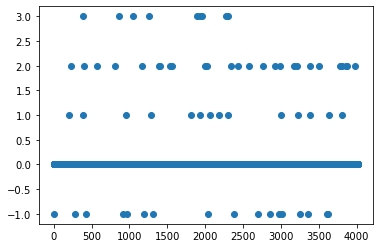

In [104]:
plt.scatter(EWALdb["ID#"],EWALdb["y_db"],cmap=plt.cm.Accent)
plt.show()

In [105]:
EWAL['y_hc']=y_hc
EWAL['y_km']=EWALkm['y_kmeans']
EWAL['y_db']=y_db
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_hc,y_km,y_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [106]:
EWAL=EWALkm.rename(columns={'Award?':'award'})
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,y_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


For hierarchical clustering we are getting 2 clusters, for kmeans we are getting 4 clusters and for DBSCAN we are getting 5 clusters.
 